In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_data = pd.read_csv(os.path.join('../../data/raw', 'train.csv'))
test_data = pd.read_csv(os.path.join('../../data/raw', 'test.csv'))
sample_submission = pd.read_csv(os.path.join('../../data/raw', 'sample_submission.csv'))

In [12]:
train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


<AxesSubplot:>

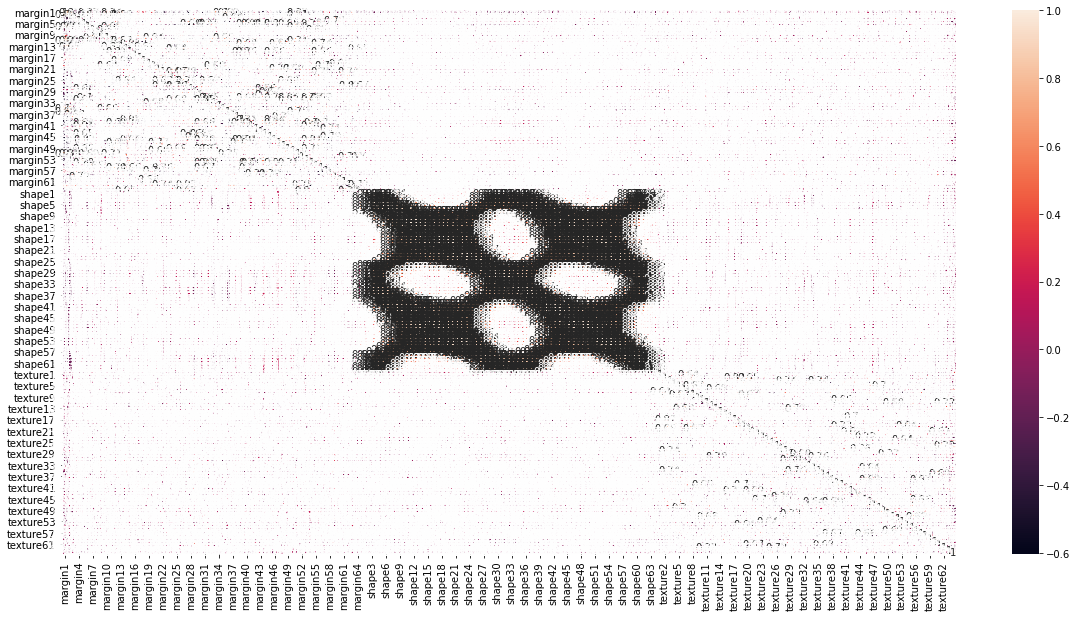

In [49]:
#sns.pairplot(x_train.iloc[:, :4], hue='species', size=3)
plt.figure(figsize=(20,10)) 
sns.heatmap(x_train.iloc[:, 1:].corr(), annot=True) 

#### Building the Pipeline

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
#onehot_encoder = OneHotEncoder(sparse=False)
#t_train = onehot_encoder.fit_transform(train_data['species'].values.reshape(len(train_data['species']), 1))


label_encoder = LabelEncoder()
t_train = label_encoder.fit_transform(train_data['species'])
x_train = train_data.drop("id", axis=1)
N, M = x_train.shape
print("Training Data:", N)
print("Dimension:", M)

Training Data: 990
Dimension: 193


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_train.iloc[:, 1:].values,
                                                    t_train,
                                                    test_size=0.25,
                                                    random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(742, 192)
(248, 192)
(742,)
(248,)


In [32]:
pipeline = Pipeline([
    ('Standardization', StandardScaler()),  # Step 1 - Normalize data (z-score)
    ('clf', LogisticRegression(max_iter=1000))  # Step 2 - Classifier
])
print(pipeline.steps)

[('Standardization', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))]


### Trying Logistic Regression Classifier
Use Cross-Validation to test the accuracy of the pipeline

In [33]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline, X_train, y_train)
print(scores)

/home/mlussier/.venv_ift712/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([3.59264994, 3.98062301, 4.12192726, 2.89191723, 2.98947668]), 'score_time': array([0.00290704, 0.00293612, 0.00105071, 0.00283194, 0.00490046]), 'test_score': array([0.97986577, 0.97986577, 0.97972973, 1.        , 0.98648649])}


In [38]:
print("Average accuracy of pipeline with Logistic Regression:", "%.2f" % (scores['test_score'].mean()*100), "%")

Average accuracy of pipeline with Logistic Regression: 98.52 %


### Trying out other classification algorithms

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [40]:
clfs = []
clfs.append(LogisticRegression(max_iter=1000))
clfs.append(SVC())
clfs.append(KNeighborsClassifier())
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
#clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf=classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('-----------------------------------------------')
    print(str(classifier))
    print('-----------------------------------------------')
    for key, values in scores.items():
        print(key, 'mean ', values.mean())
        print(key, 'std ', values.std())
    
    
    

/home/mlussier/.venv_ift712/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


-----------------------------------------------
LogisticRegression(max_iter=1000)
-----------------------------------------------
fit_time mean  3.6528191566467285
fit_time std  0.39607222497993194
score_time mean  0.0018631458282470704
score_time std  0.000837470359358211
test_score mean  0.9851895519680754
test_score std  0.007842529429010111


/home/mlussier/.venv_ift712/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


-----------------------------------------------
SVC()
-----------------------------------------------
fit_time mean  0.2141871452331543
fit_time std  0.015522629469192802
score_time mean  0.031566286087036134
score_time std  0.00034781737863922934
test_score mean  0.9730636676945401
test_score std  0.009478921846781176


/home/mlussier/.venv_ift712/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


-----------------------------------------------
KNeighborsClassifier()
-----------------------------------------------
fit_time mean  0.008252286911010742
fit_time std  0.00026018870232855665
score_time mean  0.03275008201599121
score_time std  0.005688992623302065
test_score mean  0.958244150190459
test_score std  0.015518219351702512


/home/mlussier/.venv_ift712/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


-----------------------------------------------
DecisionTreeClassifier()
-----------------------------------------------
fit_time mean  0.22925348281860353
fit_time std  0.00926238277488136
score_time mean  0.0009615421295166016
score_time std  0.00017650164608398964
test_score mean  0.6159985488844549
test_score std  0.040180351386221454


/home/mlussier/.venv_ift712/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


-----------------------------------------------
RandomForestClassifier()
-----------------------------------------------
fit_time mean  1.1443979263305664
fit_time std  0.13218799410603974
score_time mean  0.02179298400878906
score_time std  0.005203538822499389
test_score mean  0.9662978414656267
test_score std  0.004331506221456633


## Cross-Validation and Hyper-parameters Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf=SVC())  #SVC()  LogisticRegression(max_iter=1000)
print(pipeline.steps)

[('Standardization', StandardScaler()), ('clf', SVC())]


In [56]:
parameters = {
    'clf__kernel': ['linear', 'rbf', 'poly'],
    'clf__gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
    'clf__C': np.linspace(0.1, 1.2, 12)
}

cv_grid = GridSearchCV(pipeline, param_grid=parameters)

cv_grid.fit(X_train, y_train)

/home/mlussier/.venv_ift712/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(estimator=Pipeline(steps=[('Standardization', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
                         'clf__gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                         'clf__kernel': ['linear', 'rbf', 'poly']})

Best combinations of the parameters can be accessed from **best_params_**

In [57]:
print("Best Parameters from Grid Search")
print(cv_grid.best_params_)

Best Parameters from Grid Search
{'clf__C': 0.1, 'clf__gamma': 1, 'clf__kernel': 'linear'}


In [58]:
cv_grid.best_estimator_

Pipeline(steps=[('Standardization', StandardScaler()),
                ('clf', SVC(C=0.1, gamma=1, kernel='linear'))])

In [59]:
cv_grid.best_score_

0.9878741157264648

### Test set prediction

In [46]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy of the best classifier after CV is %.3f%%" % (accuracy*100))

Accuracy of the best classifier after CV is 98.387%


In [47]:
y_predict

array([86, 30, 23, 87, 70, 49, 65, 97, 61, 16, 46, 62, 65, 22,  9, 25, 44,
       73, 91, 79, 55, 57, 40, 13, 94, 54, 76, 43, 87, 96, 74, 35, 62, 31,
       55, 31,  1, 35, 68, 30, 90, 67, 96,  0, 34, 83,  2, 37, 77, 46, 13,
       57, 98, 43, 15, 89, 82, 22, 66, 96, 18, 27, 44, 51, 52, 21, 98, 12,
       40, 29, 85, 94, 34, 49, 81, 98, 40, 33, 43, 14,  3, 96, 17, 45,  7,
       26, 76, 91, 67, 42, 49, 35, 58, 46, 64, 82, 64, 95,  9, 63, 92, 97,
       33, 64, 38, 72, 18, 34, 30, 41, 58, 66, 98, 21, 75, 74,  4, 24, 68,
       11,  6, 60, 17,  5, 87,  8, 43, 89, 11,  5, 22, 61, 27, 77, 56, 18,
        0,  4, 24, 59, 94, 82, 46, 50, 43,  6, 47, 49, 73, 16, 65, 53, 56,
       58, 54, 55, 27, 26, 71, 77, 21,  9, 32, 13, 52, 11, 37, 56, 12, 25,
       70, 63, 66, 93, 25, 54, 72, 57, 66, 72, 27, 52,  0, 70, 40, 42, 12,
       37, 41, 27, 88, 41, 86, 84, 14, 44,  8, 61, 22, 47, 35, 67, 74, 93,
        2, 12,  7, 30, 62, 33, 39,  4, 42, 19, 18, 60, 47, 67, 88, 82, 71,
       61, 37, 69, 83, 68

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
			('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=42))])
			
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA', 
		4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])